**Task-1**: Read the provided images, display the images, and plot the corresponding histograms as well.

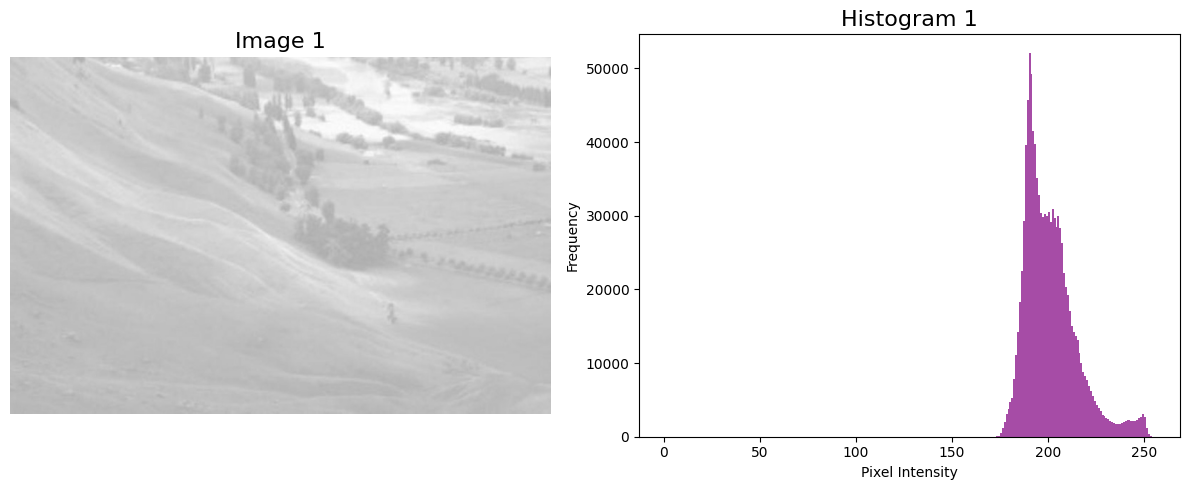

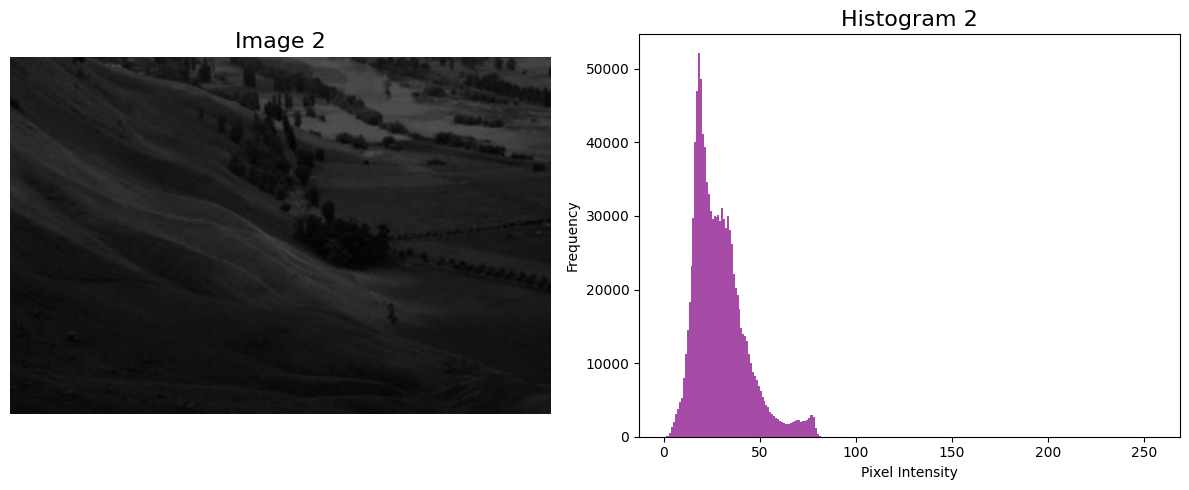

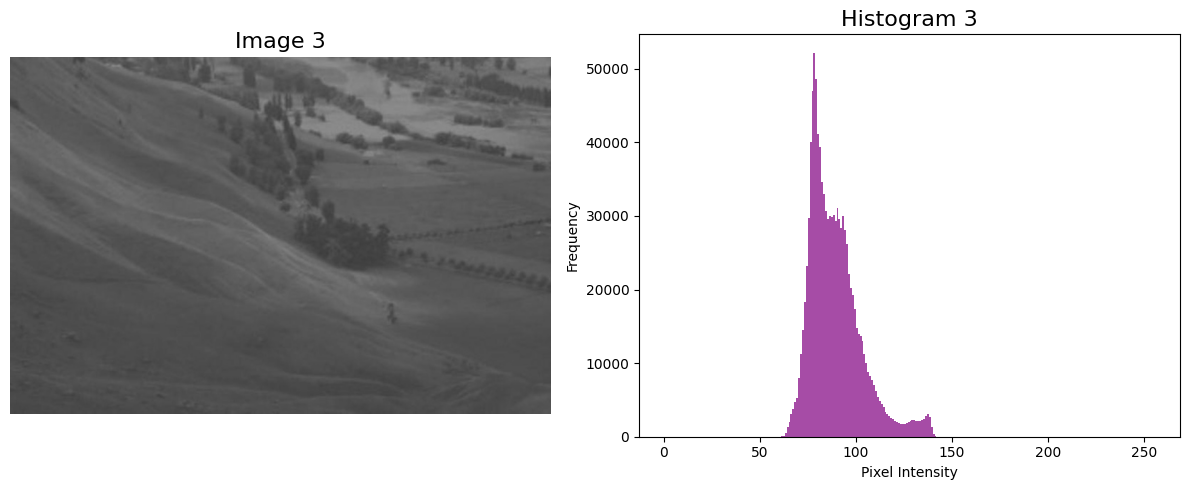

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Paths to the images you provided
image_paths = ['Image-1.jpg', 'Image-2.jpg', 'Image-3.jpg']

# Loop through the images
for idx, image_path in enumerate(image_paths):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a new figure for each image and histogram pair
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Display the image
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f'Image {idx + 1}' , fontsize=16)
    axs[0].axis('off')

    # Plot the histogram
    axs[1].hist(img.ravel(), bins=256, range=(0, 256), color='purple', alpha=0.7)
    axs[1].set_title(f'Histogram {idx + 1}' , fontsize=16)
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot for the current image and histogram
    plt.show()

**Task-2**: Apply negative transformation to each image and show the image along with the histogram.

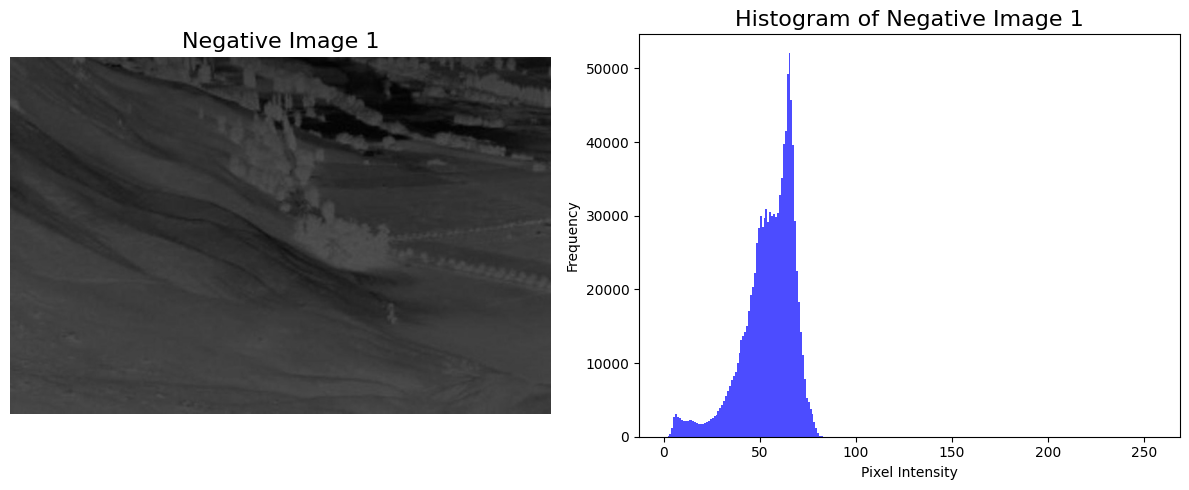

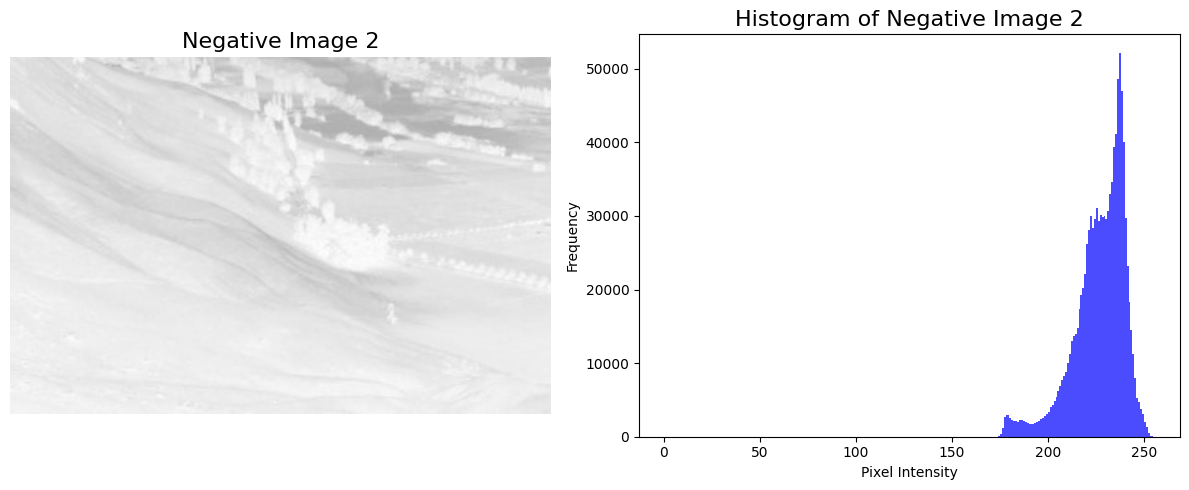

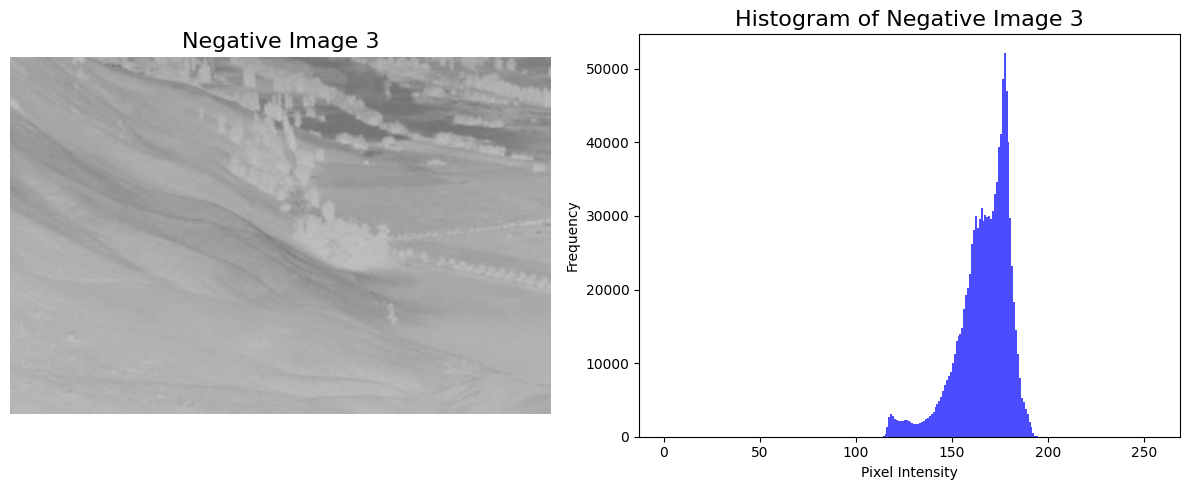

In [2]:
# Loop through the images
for idx, image_path in enumerate(image_paths):
    # Read the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    negative_img = 255 - img
    # Create a new figure for the negative image and histogram
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    # Display the negative image
    axs[0].imshow(cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f'Negative Image {idx + 1}', fontsize=16)
    axs[0].axis('off')

    # Plot the histogram of the negative image
    axs[1].hist(negative_img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    axs[1].set_title(f'Histogram of Negative Image {idx + 1}', fontsize=16)
    axs[1].set_xlabel('Pixel Intensity')
    axs[1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

**Task-3**: Choose 2 values of gamma less than 1, and 2 values of gamma greater than 1. Use these four values to perform power law transformation of all three images. Explain and discuss the output images.

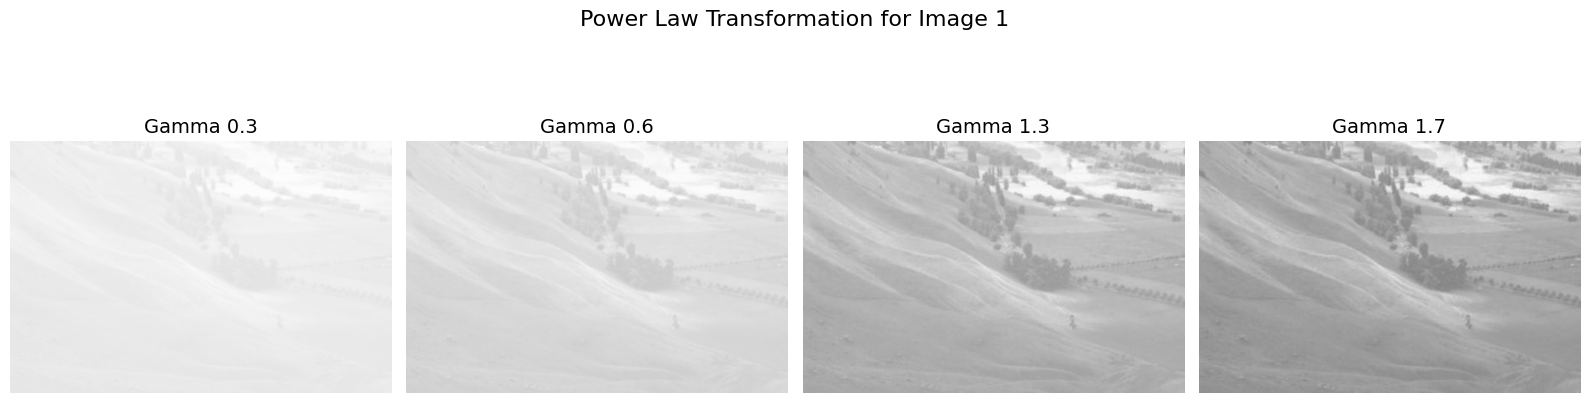

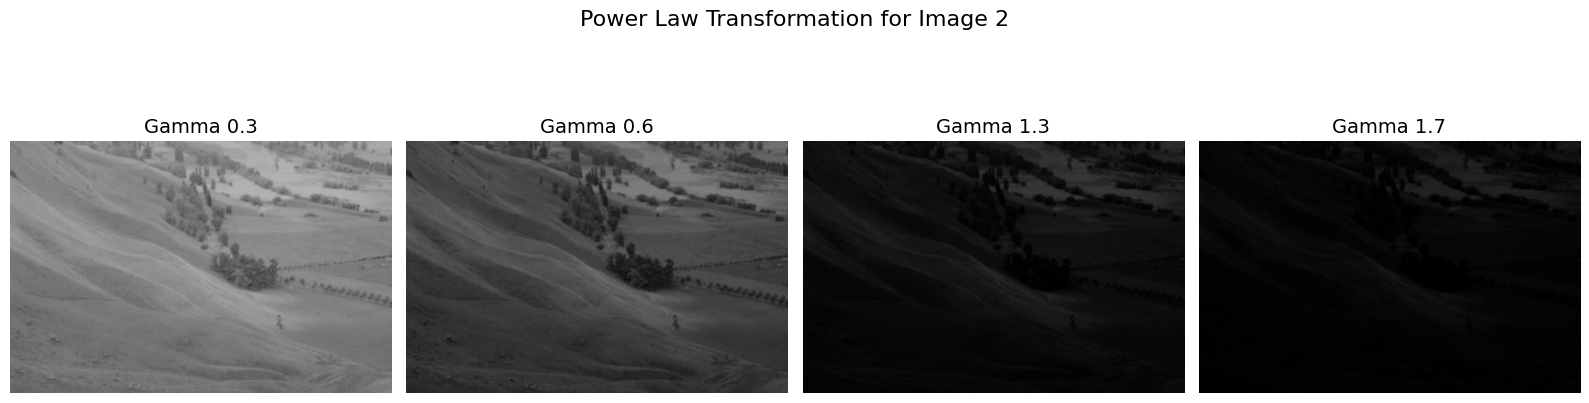

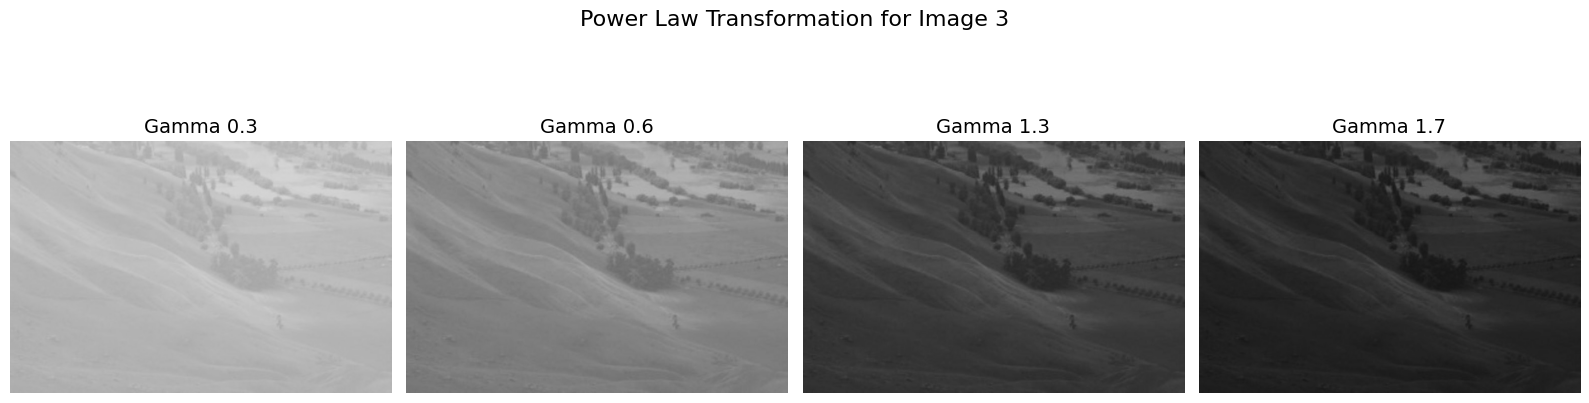

In [3]:
# Gamma values to apply (two < 1, two > 1)
gamma_values = [0.3, 0.6, 1.3, 1.7]

# Function to apply Power Law (Gamma) Transformation on a color image
def power_law_transform_color(img, gamma, c=1):
    # Normalize pixel values to range [0, 1] for each channel
    normalized_img = img / 255.0
    
    # Apply power law transformation on each channel separately
    transformed_img = c * np.power(normalized_img, gamma)
    
    # Scale back to range [0, 255] and convert to uint8
    transformed_img = np.uint8(transformed_img * 255)
    return transformed_img

# Loop through the images and apply power law transformation
for idx, image_path in enumerate(image_paths):
    # Read the image in color (BGR)
    img = cv2.imread(image_path)

    # Create a new figure for each image
    fig, axs = plt.subplots(1, len(gamma_values), figsize=(16, 5))

    # Loop through gamma values and apply the transformation
    for i, gamma in enumerate(gamma_values):
        # Apply the power law transformation to the color image
        transformed_img = power_law_transform_color(img, gamma)

        # Display the transformed image
        axs[i].imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper color display
        axs[i].set_title(f'Gamma {gamma}', fontsize=14)
        axs[i].axis('off')

    # Adjust layout for better spacing
    plt.suptitle(f'Power Law Transformation for Image {idx + 1}', fontsize=16)
    plt.tight_layout()
    plt.show()

### **Discussion**:

#### **Gamma < 1 (0.4 and 0.6)**:

- **Brightening Effect**: When gamma is less than 1, the dark regions of the image become brighter. This enhances the visibility of details in the shadowed or underexposed areas of the image.
- **Details in Dark Areas**: These gamma values are useful when the image has a lot of dark pixels, and we want to bring out details in those regions.

#### **Gamma > 1 (1.5 and 2.2)**:

- **Darkening Effect**: When gamma is greater than 1, the bright areas of the image are darkened. This enhances contrast and details in overexposed or bright regions.
- **Suppression of Bright Areas**: These gamma values are useful when the image is too bright, and we want to reduce the brightness while emphasizing details in the highlights.

#### **Observations**

- **Lower Gamma Values**: With gamma values like 0.3 and 0.6, the images appear significantly brighter, especially in the darker regions, making shadow details more visible.
- **Higher Gamma Values**: With gamma values like 1.3 and 1.7, the images appear darker, making the bright regions less intense while revealing details in those regions.


**Task-4**: Apply linear contrast stretch all three images and show the output images and their histograms.

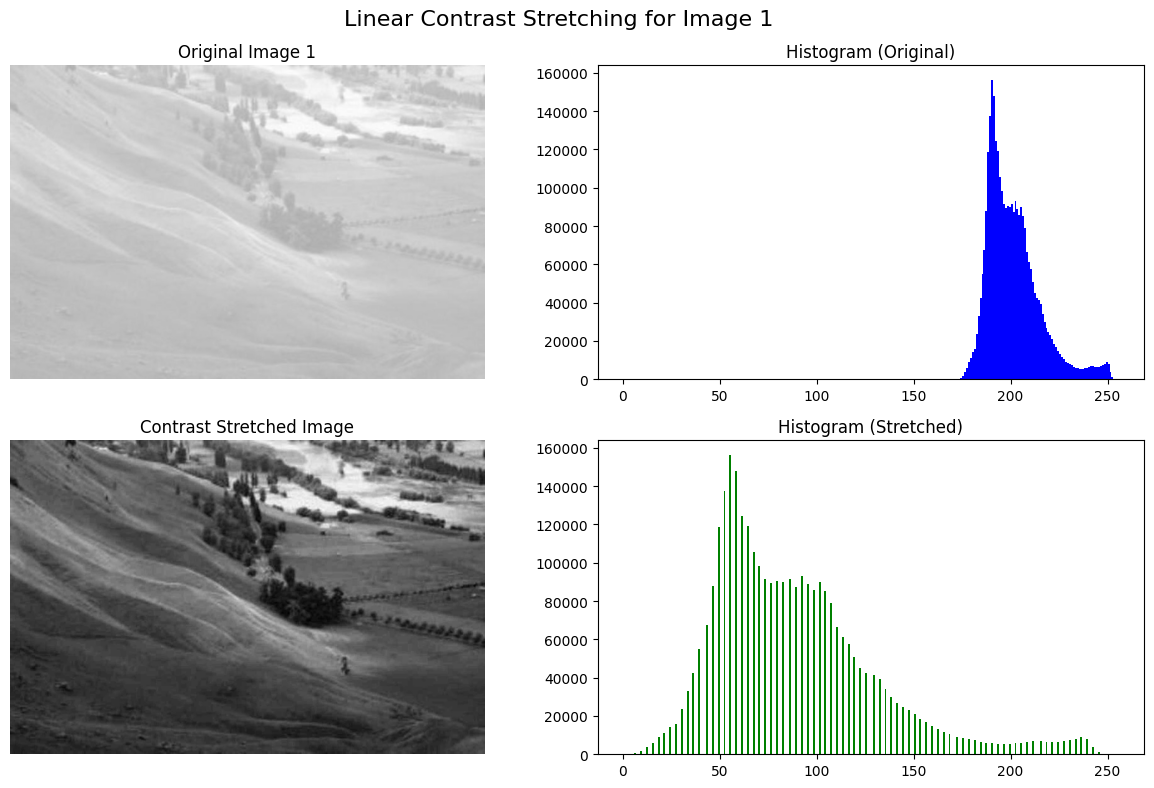

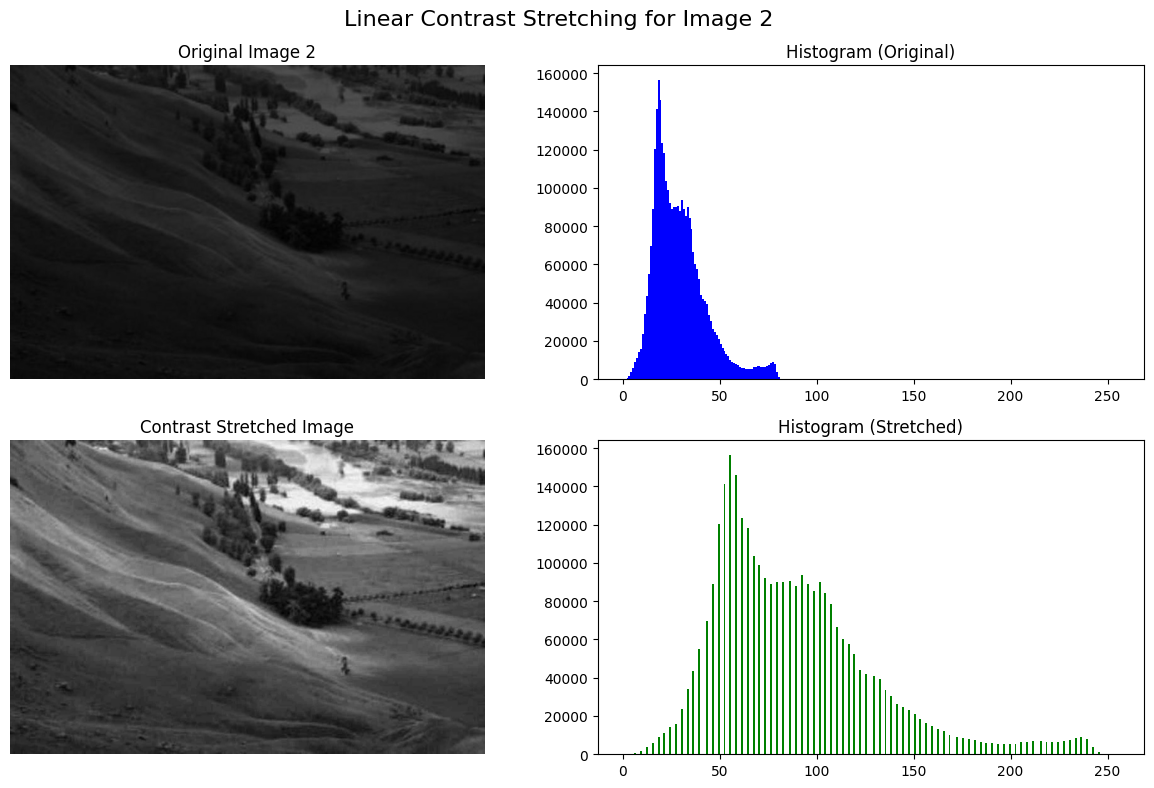

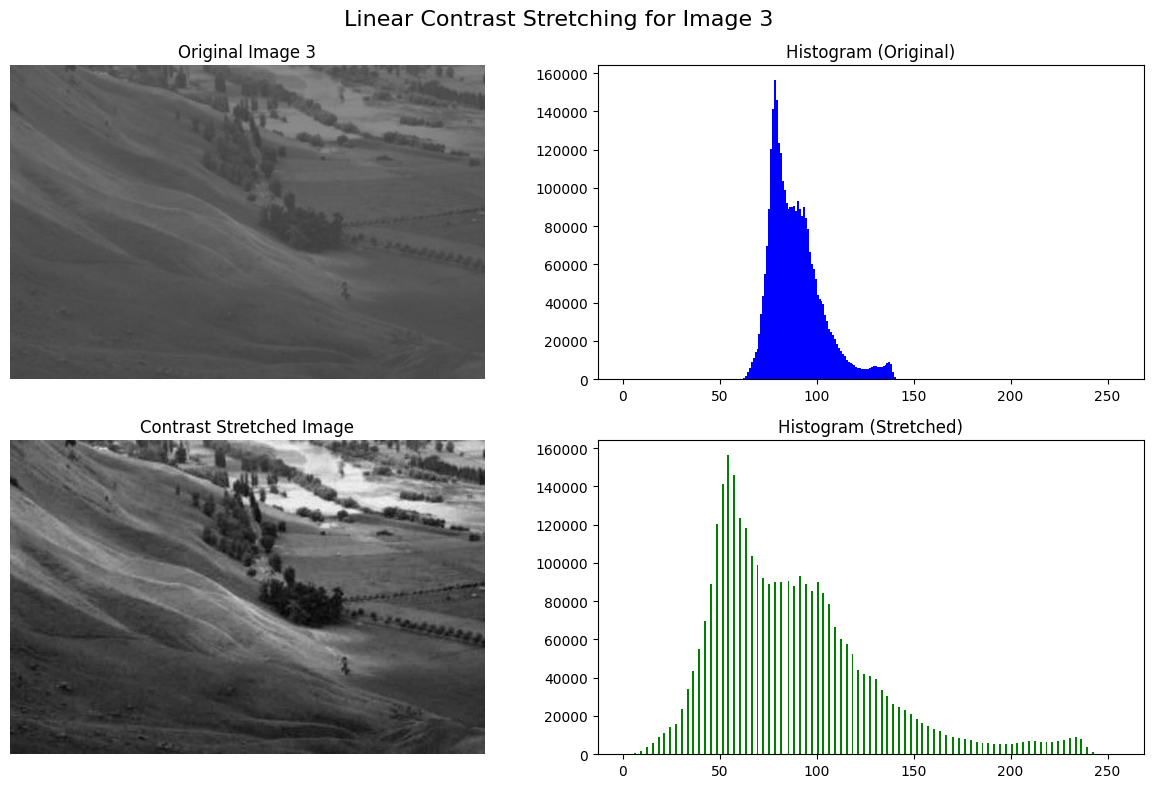

In [4]:
# Function to apply Linear Contrast Stretching on a color image
def contrast_stretch(img):
    # Split image into its respective Red, Green, and Blue channels
    channels = cv2.split(img)

    # Stretch each channel separately
    stretched_channels = []
    for channel in channels:
        r_min = np.min(channel)
        r_max = np.max(channel)
        
        # Apply contrast stretching for this channel
        stretched_channel = (channel - r_min) / (r_max - r_min) * 255.0
        stretched_channel = np.uint8(stretched_channel)
        
        stretched_channels.append(stretched_channel)
    
    # Merge the stretched channels back into an image
    stretched_img = cv2.merge(stretched_channels)
    return stretched_img

# Loop through the images and apply contrast stretching
for idx, image_path in enumerate(image_paths):
    # Read the image in color (BGR)
    img = cv2.imread(image_path)

    # Apply contrast stretching
    stretched_img = contrast_stretch(img)

    # Plot original image, stretched image, and histograms
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Original image
    axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    axs[0, 0].set_title(f'Original Image {idx + 1}')
    axs[0, 0].axis('off')

    # Histogram of original image (combined for all channels)
    axs[0, 1].hist(img.ravel(), bins=256, range=[0, 256], color='blue')
    axs[0, 1].set_title('Histogram (Original)')

    # Stretched image
    axs[1, 0].imshow(cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    axs[1, 0].set_title('Contrast Stretched Image')
    axs[1, 0].axis('off')

    # Histogram of stretched image (combined for all channels)
    axs[1, 1].hist(stretched_img.ravel(), bins=256, range=[0, 256], color='green')
    axs[1, 1].set_title('Histogram (Stretched)')

    # Adjust layout for better spacing
    plt.suptitle(f'Linear Contrast Stretching for Image {idx + 1}', fontsize=16)
    plt.tight_layout()
    plt.show()

**Task-5**: In the ‘mid’ image randomly add 10 black pixels and 10 white pixels, and then apply linear contrast stretch. Explain and discuss the output image.

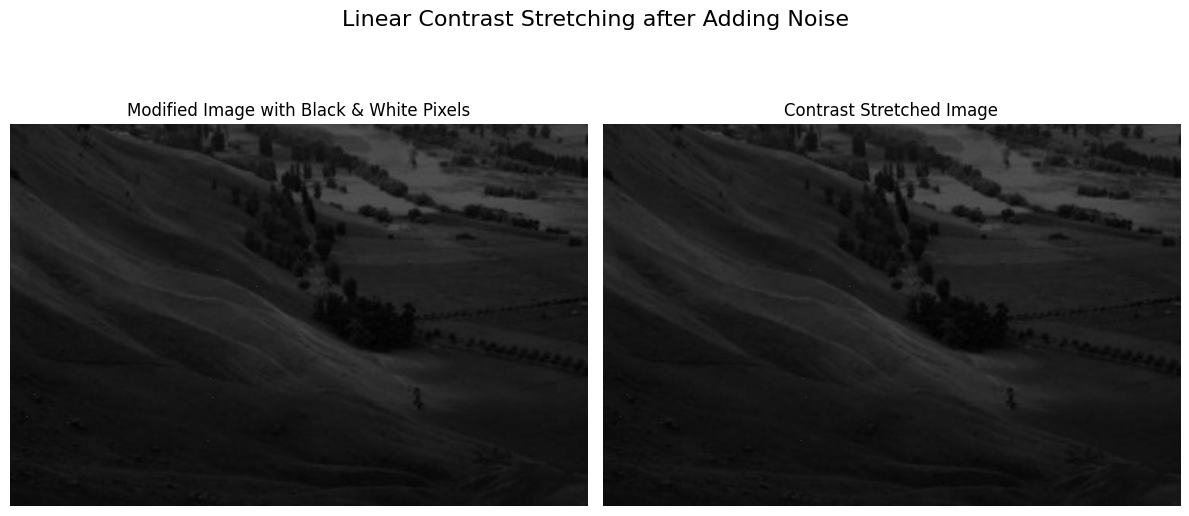

In [5]:
mid_image_path = "Image-2.jpg"
# Function to apply Linear Contrast Stretching on a color image
def contrast_stretch(img):
    channels = cv2.split(img)
    stretched_channels = []
    for channel in channels:
        r_min = np.min(channel)
        r_max = np.max(channel)
        stretched_channel = (channel - r_min) / (r_max - r_min) * 255.0
        stretched_channel = np.uint8(stretched_channel)
        stretched_channels.append(stretched_channel)
    stretched_img = cv2.merge(stretched_channels)
    return stretched_img

# Load the 'mid' image
mid_img = cv2.imread(mid_image_path)

# Add random black and white pixels
height, width, _ = mid_img.shape
num_black_pixels = 10
num_white_pixels = 10

# Generate random coordinates for black pixels
black_coords = np.random.randint(0, min(height, width), (num_black_pixels, 2))
for y, x in black_coords:
    mid_img[y, x] = [0, 0, 0]  # Set pixel to black

# Generate random coordinates for white pixels
white_coords = np.random.randint(0, min(height, width), (num_white_pixels, 2))
for y, x in white_coords:
    mid_img[y, x] = [255, 255, 255]  # Set pixel to white

# Apply linear contrast stretching
stretched_img = contrast_stretch(mid_img)

# Plot the original and stretched images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the modified image with black and white pixels
axs[0].imshow(cv2.cvtColor(mid_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
axs[0].set_title('Modified Image with Black & White Pixels')
axs[0].axis('off')

# Display the contrast-stretched image
axs[1].imshow(cv2.cvtColor(stretched_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
axs[1].set_title('Contrast Stretched Image')
axs[1].axis('off')

plt.suptitle('Linear Contrast Stretching after Adding Noise', fontsize=16)
plt.tight_layout()
plt.show()

## **Discussion**

### **1. Original Image and Noise Addition:**
The original image consists of gray levels between 0 and 80, meaning it has limited contrast compared to a typical grayscale image which would range from 0 to 255. 

After adding **10 random black pixels** (value 0) and **10 random white pixels** (value 80), the image now contains some extreme pixel values that weren’t previously there. These black and white pixels introduce additional points at the extreme ends of the intensity range, though they only slightly affect the overall visual perception due to their limited number (just 20 pixels).

### **2. Effect of Adding Black and White Pixels:**
- **Black pixels (0)** lower the overall minimum intensity, while **white pixels (80)** reinforce the highest original intensity of the image.
- These pixels are sparsely distributed, so their presence does not drastically alter the image’s overall appearance. However, they have a significant impact when applying contrast stretching, as they influence the range of pixel values used for stretching.

### **3. Linear Contrast Stretching:**
- **Before Stretching:**  
  The image initially has a limited dynamic range (0 to 80). This means that most of the gray levels are concentrated in a relatively small portion of the total available range for pixel intensities. This limited range makes the image look low-contrast and somewhat dull.

- **After Stretching:**  
  Linear contrast stretching remaps the pixel values so that the minimum pixel intensity (0) is stretched to 0, and the maximum pixel intensity (80) is stretched to 255. This expands the image’s intensity range to cover the full 0-255 spectrum.
    - The black pixels remain at 0, while the white pixels are now stretched to 255.
    - All intermediate pixel values are proportionally scaled based on the original 0-80 range. This results in a more **contrasty** image, with much sharper differences between dark and light areas.
    
- **Impact on Visuals:**  
  Visually, the stretched image appears much brighter and clearer than the original, with a more defined contrast between different regions. The formerly subtle differences between gray levels become more pronounced, making the details in the image stand out more. This contrast enhancement can help in better visual interpretation of the image.

### **4. Impact on Histogram:**
- **Before Stretching:**  
  The histogram of the original image would show most of the pixel values clustered between 0 and 80, with little or no values above that range.

- **After Stretching:**  
  The contrast stretching operation redistributes the pixel values across the entire range from 0 to 255. The histogram now spreads out more evenly, with more pixel values spread across the full range.
    - The presence of newly introduced 0s (black pixels) and 255s (white pixels) becomes apparent.
    - The central region of the histogram, which previously covered 0 to 80, now spans the entire range, making it appear stretched and less concentrated than before.



**Task-6**: In the ‘mid’ image, divide the available grey levels into three equal segments. Compress the contrast of the first and third segment by 2 and assign the remaining dynamic range to segment two. Plot the transformation function and the show the output image along with its histogram.

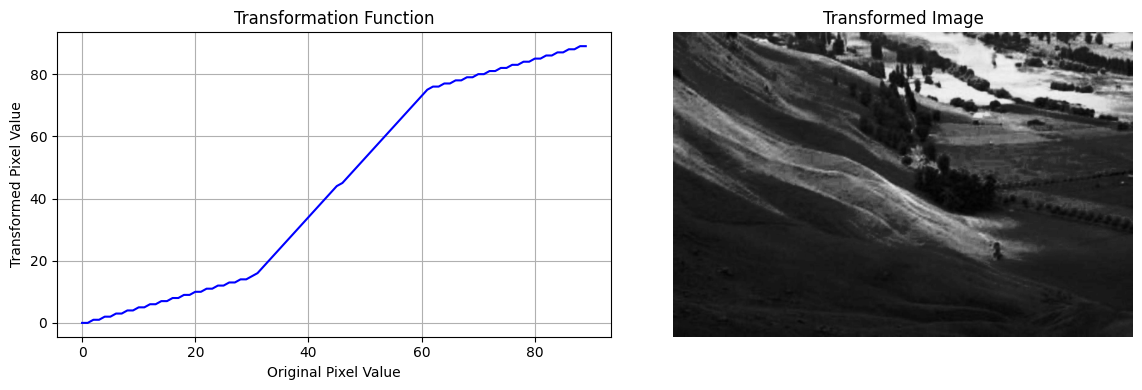

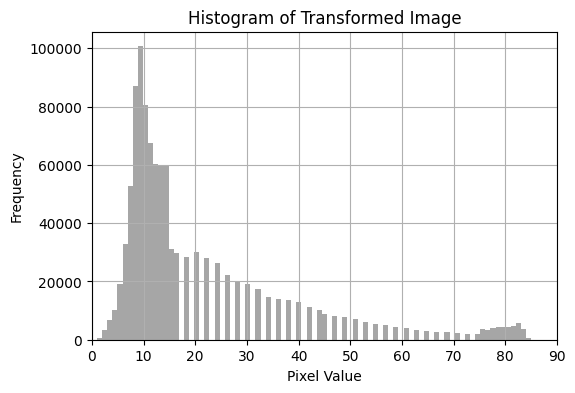

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your grayscale image (0-80 gray level range)
gray_img = cv2.imread('Image-2.jpg', cv2.IMREAD_GRAYSCALE)

# Define the available gray levels
L = 90  # Gray levels from 0 to 80

# Segment ranges
segment1_range = (0, L // 3)  # First segment: 0 to 26
segment2_range = (L // 3, 2 * L // 3)  # Second segment: 27 to 53
segment3_range = (2 * L // 3, L - 1)  # Third segment: 54 to 80

# Compression factor
compression_factor = 2

# Calculate compressed ranges
compressed_segment1_range = (0, segment1_range[1] // compression_factor)
compressed_segment3_range = (L - 1 - ((L - 1 - segment3_range[0]) // compression_factor), L - 1)

# Calculate stretched segment2 range
stretched_segment2_range = (compressed_segment1_range[1] + 1, compressed_segment3_range[0] - 1)

# Create the transformation function
def contrast_compression(pixel_value):
    if pixel_value <= segment1_range[1]:
        return pixel_value // compression_factor  # Compress the first segment
    elif pixel_value <= segment2_range[1]:
        # Stretch the middle segment
        return compressed_segment1_range[1] + int(((pixel_value - segment1_range[1]) / (segment2_range[1] - segment1_range[1])) * (stretched_segment2_range[1] - stretched_segment2_range[0]))
    else:
        return compressed_segment3_range[0] + ((pixel_value - segment3_range[0]) // compression_factor)  # Compress the third segment

# Apply the transformation to the image
transformed_img = np.zeros_like(gray_img)
for i in range(gray_img.shape[0]):
    for j in range(gray_img.shape[1]):
        transformed_img[i, j] = contrast_compression(gray_img[i, j])

# Plot the transformation function
x = np.arange(L)
y = np.array([contrast_compression(i) for i in x])
plt.figure(figsize=(12, 4))
# Plot transformation function
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue')
plt.title('Transformation Function')
plt.xlabel('Original Pixel Value')
plt.ylabel('Transformed Pixel Value')
plt.grid()
# Show transformed image
plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray', vmin=0, vmax=90)
plt.title('Transformed Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Plot histogram of transformed image
plt.figure(figsize=(6, 4))
plt.hist(transformed_img.ravel(), bins=91, range=[0, 90], color='gray', alpha=0.7)
plt.title('Histogram of Transformed Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 90])
plt.grid()
plt.show()